### MLP for analytes classification on the lower part of the spectra using 50 PC
#### Edgar Acuna
#### July 2020

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [2]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [4]:
dfset3=dfset1.copy()
dfset3=dfset3.iloc[:,0:600]

In [5]:
from sklearn.decomposition import PCA
dfset4=dfset3.copy()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dfset4)
dfset3['pca-one'] = pca_result[:,0]
dfset3['pca-two'] = pca_result[:,1] 
dfset3['pca-three'] = pca_result[:,2]
pca_result.shape
b=pd.DataFrame(pca_result)
b.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-3.011880,-0.293119,-0.014556,-0.165692,0.138618,-0.013305,-0.011041,-0.136378,-0.027276,0.043958,...,-0.003026,-0.003374,0.003275,0.006709,0.000243,0.001225,-0.008636,-0.005572,-0.002610,0.004132
1,14.780626,-0.257458,-0.282557,0.015802,0.080279,-0.222944,-0.233429,0.215533,-0.061237,-0.093064,...,-0.000048,-0.008293,0.003616,-0.010824,-0.003502,0.000339,0.007285,0.000124,-0.006382,0.003875
2,-2.013662,0.523393,-0.079360,0.456295,-0.094182,-0.062630,-0.013776,-0.019774,0.007018,0.031852,...,0.002556,0.000626,-0.002208,-0.002324,-0.001818,0.006969,0.000101,0.006840,0.009590,0.004939
3,-2.231554,0.480415,-0.066154,0.448957,-0.033304,-0.132820,-0.004732,-0.026102,-0.000955,0.017358,...,0.005096,0.001287,-0.001489,-0.000412,0.001321,0.000956,0.001006,0.000276,0.000230,0.000293
4,-3.479203,-0.520703,0.003115,-0.162048,0.077606,-0.007439,0.029470,0.009211,-0.014149,0.022831,...,0.000817,0.007838,-0.004409,-0.002721,-0.007552,-0.000711,-0.000411,0.002272,0.001429,-0.003124


In [6]:
# Configuration options
feature_vector_length = 50
num_classes = 18000

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(b,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 50)
Test dimension:
(5400, 50)


In [8]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (50,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 400)               20400     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_2 (Dense)              (None, 18000)             918000    
Total params: 958,450
Trainable params: 958,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
202/202 [==============================] - 3s 14ms/step - loss: 6.4055 - accuracy: 0.0298 - val_loss: 3.7373 - val_accuracy: 0.0286
Epoch 2/100
202/202 [==============================] - 2s 12ms/step - loss: 3.7105 - accuracy: 0.0295 - val_loss: 3.6248 - val_accuracy: 0.0508
Epoch 3/100
202/202 [==============================] - 3s 12ms/step - loss: 3.5819 - accuracy: 0.0610 - val_loss: 3.2577 - val_accuracy: 0.1766
Epoch 4/100
202/202 [==============================] - 3s 13ms/step - loss: 3.1658 - accuracy: 0.1692 - val_loss: 2.6481 - val_accuracy: 0.3504
Epoch 5/100
202/202 [==============================] - 3s 13ms/step - loss: 2.7638 - accuracy: 0.2826 - val_loss: 2.2623 - val_accuracy: 0.4734
Epoch 6/100
202/202 [==============================] - 3s 13ms/step - loss: 2.4995 - accuracy: 0.3655 - val_loss: 2.0164 - val_accuracy: 0.5567
Epoch 7/100
202/202 [==============================] - 3s 13ms/step - loss: 2.2643 - accuracy: 0.4167 - val_loss: 1.8140 - val_accuracy:

202/202 [==============================] - 3s 16ms/step - loss: 0.9272 - accuracy: 0.7711 - val_loss: 0.6612 - val_accuracy: 0.8524
Epoch 58/100
202/202 [==============================] - 3s 16ms/step - loss: 0.9099 - accuracy: 0.7697 - val_loss: 0.6323 - val_accuracy: 0.8639
Epoch 59/100
202/202 [==============================] - 3s 16ms/step - loss: 0.8908 - accuracy: 0.7805 - val_loss: 0.6280 - val_accuracy: 0.8647
Epoch 60/100
202/202 [==============================] - 3s 16ms/step - loss: 0.8832 - accuracy: 0.7758 - val_loss: 0.6307 - val_accuracy: 0.8591
Epoch 61/100
202/202 [==============================] - 3s 16ms/step - loss: 0.8906 - accuracy: 0.7669 - val_loss: 0.6349 - val_accuracy: 0.8631
Epoch 62/100
202/202 [==============================] - 3s 16ms/step - loss: 0.9145 - accuracy: 0.7726 - val_loss: 0.6412 - val_accuracy: 0.8544
Epoch 63/100
202/202 [==============================] - 3s 16ms/step - loss: 0.8540 - accuracy: 0.7779 - val_loss: 0.6302 - val_accuracy: 0.856

In [10]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [11]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

169/169 [==============================] - 2s 9ms/step - loss: 0.6004 - accuracy: 0.8704
[0.6003665924072266, 0.8703703880310059]
Test results - Loss: 0.6003665924072266 - Accuracy: 0.8703703880310059%


### 2.  Classification of the first analyte

In [12]:
labels=list(range(1,41))

In [13]:
yclass=y.copy()
yclass[yclass!=1]=0
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 50)
Test dimension:
(5400, 50)


In [14]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (50,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               20400     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_5 (Dense)              (None, 18000)             918000    
Total params: 958,450
Trainable params: 958,450
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/50
101/101 [==============================] - 5s 44ms/step - loss: 6.4530 - accuracy: 1.0000 - precision: 0.7834 - recall: 0.2106 - val_loss: 0.1753 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 2/50
101/101 [==============================] - 4s 35ms/step - loss: 0.1697 - accuracy: 1.0000 - precision: 0.9788 - recall: 0.9786 - val_loss: 0.1494 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 3/50
101/101 [==============================] - 4s 36ms/step - loss: 0.1189 - accuracy: 1.0000 - precision: 0.9792 - recall: 0.9787 - val_loss: 0.1157 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 4/50
101/101 [==============================] - 4s 36ms/step - loss: 0.1009 - accuracy: 1.0000 - precision: 0.9766 - recall: 0.9761 - val_loss: 0.0887 - val_accuracy: 1.0000 - val_precision: 0.9781 - val_recall: 0.9770
Epoch 5/50
101/101 [==============================] - 4s 35ms/step - loss: 0.0781 - accuracy: 1.0000

101/101 [==============================] - 4s 35ms/step - loss: 0.0339 - accuracy: 1.0000 - precision: 0.9903 - recall: 0.9903 - val_loss: 0.0359 - val_accuracy: 1.0000 - val_precision: 0.9905 - val_recall: 0.9905
Epoch 38/50
101/101 [==============================] - 4s 36ms/step - loss: 0.0326 - accuracy: 1.0000 - precision: 0.9912 - recall: 0.9912 - val_loss: 0.0323 - val_accuracy: 1.0000 - val_precision: 0.9905 - val_recall: 0.9905
Epoch 39/50
101/101 [==============================] - 4s 36ms/step - loss: 0.0283 - accuracy: 1.0000 - precision: 0.9916 - recall: 0.9914 - val_loss: 0.0288 - val_accuracy: 1.0000 - val_precision: 0.9905 - val_recall: 0.9905
Epoch 40/50
101/101 [==============================] - 4s 35ms/step - loss: 0.0290 - accuracy: 1.0000 - precision: 0.9907 - recall: 0.9907 - val_loss: 0.0242 - val_accuracy: 1.0000 - val_precision: 0.9909 - val_recall: 0.9909
Epoch 41/50
101/101 [==============================] - 4s 36ms/step - loss: 0.0298 - accuracy: 1.0000 - prec

In [16]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

169/169 [==============================] - 2s 9ms/step - loss: 0.0134 - accuracy: 1.0000 - precision: 0.9961 - recall: 0.9961
Test results - Loss: 0.013407813385128975 - Accuracy: 0.9999997019767761% -Precision: 0.9961110949516296% -Recall: 0.9961110949516296%


In [17]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

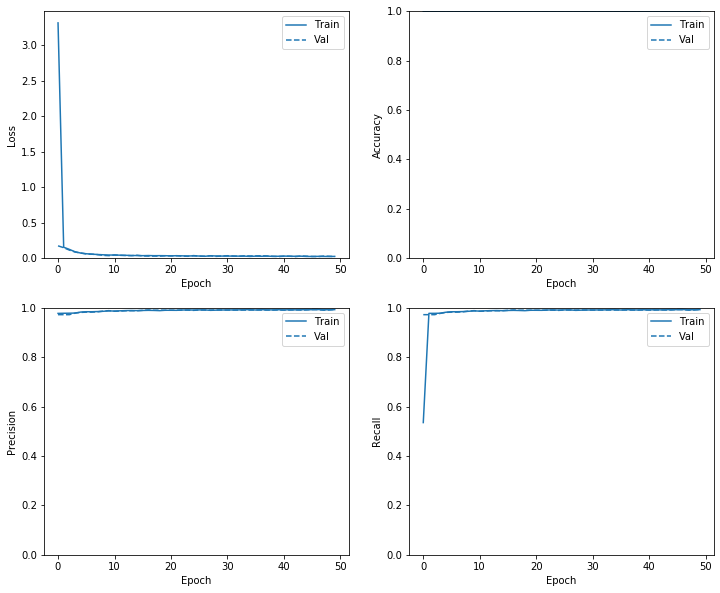

In [18]:
plot_metrics(baseline_history)

In [19]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
print(len(test_labels))
print(np.count_nonzero(test_labels==1))
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
print(np.count_nonzero(test_predictions_baseline==1))
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

5400
149


C:\Users\eacun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


134
f1_scores, training set [0.99801096 0.91327434] f1_scores in testing set [0.99800323 0.92579505]


In [20]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)
print(fp1)

[0.00000000e+00 5.71319749e-04 1.00000000e+00]


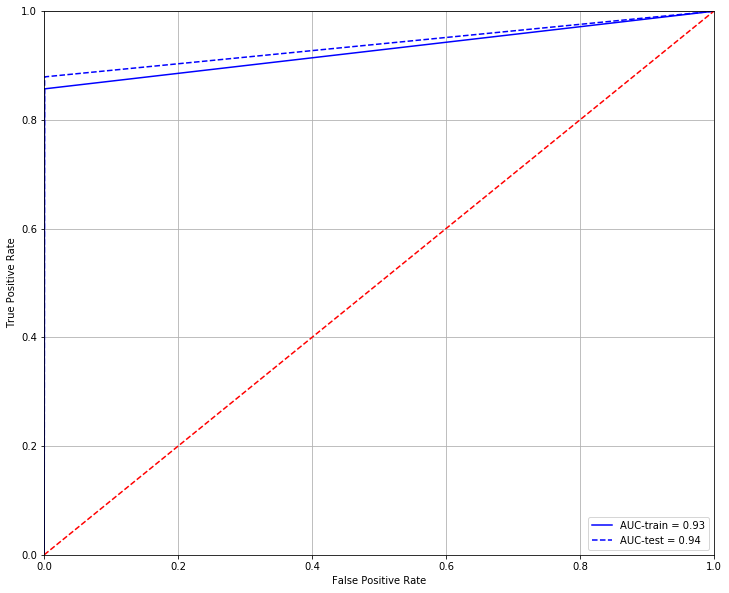

In [21]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()